In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dom_vis = pd.read_csv('Dom_visitors.csv')
for_vis = pd.read_csv('For_visitors.csv')
dis_pop = pd.read_csv('district_pop.csv')

In [3]:
# Data Cleaning and Tranformation

In [4]:
dom_vis

,district,date,month,year,visitors
0,Adilabad,2016-01-01,January,2016,792136.0
1,Adilabad,2016-02-01,February,2016,937820.0
2,Adilabad,2016-03-01,March,2016,582946.0
3,Adilabad,2016-04-01,April,2016,341948.0
4,Adilabad,2016-05-01,May,2016,252887.0
...,...,...,...,...,...
1507,Yadadri Bhongir,2019-08-01,August,2019,389010.0
1508,Yadadri Bhongir,2019-09-01,September,2019,366862.0
1509,Yadadri Bhongir,2019-10-01,October,2019,381860.0
1510,Yadadri Bhongir,2019-11-01,November,2019,365990.0


In [5]:
dom_vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  1512 non-null   object 
 1   date      1512 non-null   object 
 2   month     1512 non-null   object 
 3   year      1512 non-null   int64  
 4   visitors  1482 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 59.2+ KB


In [6]:
dom_vis.describe()

,year,visitors
count,1512.00000,1.482000e+03
mean,2017.52381,2.404465e+05
std,1.12523,8.271528e+05
min,2016.00000,0.000000e+00
25%,2017.00000,5.850000e+01
50%,2018.00000,2.803400e+04
75%,2019.00000,2.083440e+05
max,2019.00000,2.070378e+07


In [7]:
dom_vis.isnull().sum()

district     0
date         0
month        0
year         0
visitors    30
dtype: int64

In [8]:
for_vis.isnull().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

In [9]:
dis_pop.isnull().sum()

district            0
population(2011)    0
population          0
dtype: int64

In [10]:
dom_vis2 = dom_vis.copy()

In [11]:
dom_vis2['visitors'].fillna(0,inplace = True)

C:\Users\Archit jain\AppData\Local\Temp\ipykernel_15000\3098135680.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dom_vis2['visitors'].fillna(0,inplace = True)


In [12]:
dom_vis2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  1512 non-null   object 
 1   date      1512 non-null   object 
 2   month     1512 non-null   object 
 3   year      1512 non-null   int64  
 4   visitors  1512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 59.2+ KB


In [13]:
dom_vis2['date'] = pd.to_datetime(dom_vis2['date'])

In [14]:
dom_vis2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   district  1512 non-null   object        
 1   date      1512 non-null   datetime64[ns]
 2   month     1512 non-null   object        
 3   year      1512 non-null   int64         
 4   visitors  1512 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 59.2+ KB


In [15]:
for_vis['date'] = pd.to_datetime(for_vis['date'])

In [16]:
for_vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   district  1512 non-null   object        
 1   date      1512 non-null   datetime64[ns]
 2   month     1512 non-null   object        
 3   year      1512 non-null   int64         
 4   visitors  1512 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 59.2+ KB


In [17]:
#data analyis

In [18]:
grouped_dom_vis = dom_vis2.groupby('district')['visitors'].sum().reset_index()

In [19]:
grouped_dom_vis

,district,visitors
0,Adilabad,7321575.0
1,Bhadradri Kothagudem,21600962.0
2,Hyderabad,83900960.0
3,Jagtial,11303514.0
4,Jangaon,826280.0
5,Jayashankar Bhoopalpally,19632865.0
6,Jogulamba Gadwal,6813340.0
7,Kamareddy,1773.0
8,Karimnagar,9462383.0
9,Khammam,9378315.0


In [20]:
grouped_for_vis = for_vis.groupby('district')['visitors'].sum().reset_index()

In [21]:
# Top 10 districts by domestic visitors
top_dom = grouped_dom_vis.sort_values(by = 'visitors', ascending = False)
top_dom.head(10)

,district,visitors
2,Hyderabad,83900960.0
23,Rajanna Sircilla,41763276.0
31,Warangal (Urban),30726603.0
32,Yadadri Bhongir,26893080.0
1,Bhadradri Kothagudem,21600962.0
14,Medak,20542639.0
5,Jayashankar Bhoopalpally,19632865.0
12,Mahbubnagar,17180118.0
20,Nirmal,13315796.0
3,Jagtial,11303514.0


In [22]:
#top 10 districts by foreigner visitors
top_for = grouped_for_vis.sort_values(by = 'visitors', ascending = False)
top_for.head(10)

,district,visitors
2,Hyderabad,1044898
31,Warangal (Urban),8821
12,Mahbubnagar,2282
5,Jayashankar Bhoopalpally,1252
6,Jogulamba Gadwal,945
17,Nagarkurnool,761
16,Mulugu,575
30,Warangal (Rural),306
0,Adilabad,32
13,Mancherial,10


In [23]:
#top 3 districts based on cagr from 2016 - 2019
fil_dom_vis = dom_vis2[dom_vis2['year'].isin([2016,2019])]
g_dom_vis = fil_dom_vis.groupby(['district', 'year'])['visitors'].sum().reset_index()
pivot_dom_vis = g_dom_vis.pivot(index = 'district', columns = 'year', values = 'visitors').reset_index()
# pivot_dom_vis[2016].fillna(0, inplace = True)
# pivot_dom_vis[2019].fillna(0, inplace = True)
pivot_dom_vis.dropna(subset = [2016, 2019], inplace = True)
pivot_dom_vis = pivot_dom_vis[(pivot_dom_vis[2016] > 0) & (pivot_dom_vis[2019] > 0)]
pivot_dom_vis['CAGR'] = (((pivot_dom_vis[2019]/pivot_dom_vis[2016])**(1/3)) - 1)*100
pivot_dom_vis.sort_values(by = 'CAGR', ascending = False).head(3)

year,district,2016,2019,CAGR
13,Mancherial,7802.0,269810.0,225.799714
30,Warangal (Rural),19400.0,353500.0,163.145469
1,Bhadradri Kothagudem,889030.0,12817737.0,143.387524


In [24]:
#top 3 districts with high domestic to foreign visitor ratio
merged_vis = pd.merge(grouped_dom_vis, grouped_for_vis, on = 'district', suffixes=('_domestic', '_foreign'))
merged_vis = merged_vis[merged_vis['visitors_domestic'] > 0]
merged_vis['F_D_RATIO'] = merged_vis['visitors_foreign']/merged_vis['visitors_domestic']
merged_vis.sort_values(by = 'F_D_RATIO', ascending = False).head(3)

,district,visitors_domestic,visitors_foreign,F_D_RATIO
2,Hyderabad,83900960.0,1044898,0.012454
29,Warangal (Rural),819162.0,306,0.000374
16,Mulugu,1819800.0,575,0.000316


In [25]:
#top months in hydrabad district
grouped_dom_vis2 = dom_vis2.groupby(['district', 'month'])['visitors'].sum().reset_index()
grouped_dom_vis2 = grouped_dom_vis2[grouped_dom_vis2['district'] == 'Hyderabad']
grouped_dom_vis2.sort_values(by = 'visitors', ascending = False).head(3)

,district,month,visitors
30,Hyderabad,June,16897783.0
26,Hyderabad,December,9338637.0
34,Hyderabad,October,6552397.0


In [26]:
#top 5 districts based on tourist footfall ratio by population in 2019
grouped_dom_vis3 = dom_vis2.groupby(['district', 'year'])['visitors'].sum().reset_index()
grouped_for_vis3 = for_vis.groupby(['district', 'year'])['visitors'].sum().reset_index()
merged_total_visitors = pd.merge(grouped_dom_vis3, grouped_for_vis3, on = 'district', suffixes=('_domestic', '_foreign'))
merged_total_visitors = merged_total_visitors[(merged_total_visitors['year_domestic'] == 2019) & (merged_total_visitors['year_foreign'] == 2019)]
merged_total_visitors['Total_Visitors_2019'] = merged_total_visitors['visitors_domestic'] + merged_total_visitors['visitors_foreign']
merged_total_visitors = merged_total_visitors.drop(['year_domestic', 'visitors_domestic', 'year_foreign', 'visitors_foreign'], axis = 1)
# dis_pop = dis_pop.drop('population(2011)', axis = 1)
merged_visit_pop = pd.merge(merged_total_visitors, dis_pop, on = 'district')
merged_visit_pop['Ratio'] = merged_visit_pop['Total_Visitors_2019']/merged_visit_pop['population']
top5dis = merged_visit_pop.sort_values(by = 'Ratio', ascending = False).head(5) 

<Axes: xlabel='district', ylabel='Ratio'>

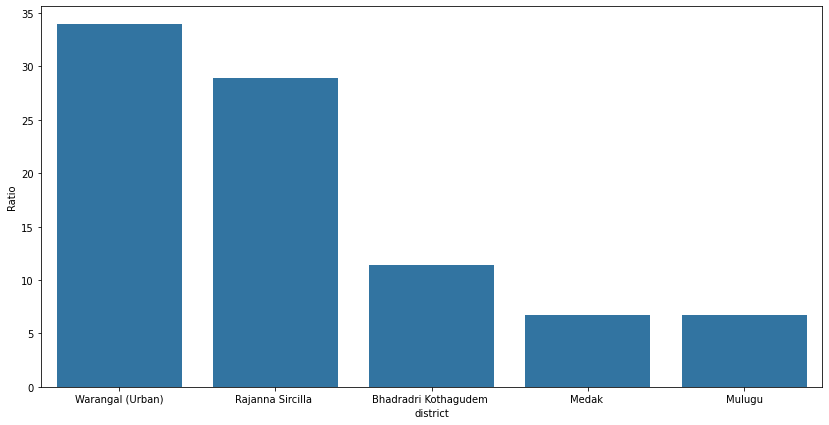

In [27]:
plt.figure(figsize=(14, 7))
sns.barplot(x = 'district', y = 'Ratio', data = top5dis)

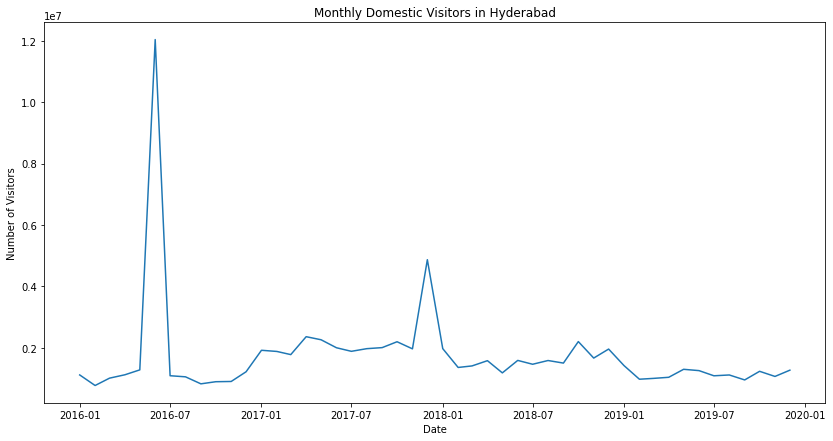

In [28]:
district_data = dom_vis2[dom_vis2['district'] == 'Hyderabad']
plt.figure(figsize=(14, 7))
plt.plot(district_data['date'], district_data['visitors'])
plt.title('Monthly Domestic Visitors in Hyderabad')
plt.xlabel('Date')
plt.ylabel('Number of Visitors')
plt.show()

In [29]:
#Projected visitors in Hyderabad in 2025
fil_dom_vis2 = dom_vis2[dom_vis2['district'] == 'Hyderabad']
fil_dom_vis2 = fil_dom_vis2.drop('month', axis = 1)
grouped_dom_vis4 = fil_dom_vis2.groupby('year')['visitors'].sum().reset_index()
grouped_dom_vis4

,year,visitors
0,2016,23394705.0
1,2017,27160242.0
2,2018,19543651.0
3,2019,13802362.0


In [30]:
fil_dom_vis2

,district,date,year,visitors
24,Hyderabad,2016-01-01,2016,1122510.0
25,Hyderabad,2016-02-01,2016,778748.0
26,Hyderabad,2016-03-01,2016,1017794.0
27,Hyderabad,2016-04-01,2016,1127738.0
28,Hyderabad,2016-05-01,2016,1287181.0
29,Hyderabad,2016-06-01,2016,12032661.0
30,Hyderabad,2016-07-01,2016,1096754.0
31,Hyderabad,2016-08-01,2016,1061137.0
32,Hyderabad,2016-09-01,2016,832987.0
33,Hyderabad,2016-10-01,2016,901960.0


In [31]:
initial_visitors = grouped_dom_vis4[grouped_dom_vis4['year'] == 2016]['visitors'].values[0]
final_visitors = grouped_dom_vis4[grouped_dom_vis4['year'] == 2019]['visitors'].values[0]
initial_date = pd.Timestamp('2016-01-01')
final_date = pd.Timestamp('2019-12-01')
years = 3
cagr = (final_visitors / initial_visitors) ** (1 / years) - 1
projected_date = pd.Timestamp('2025-12-01')
years_to_project = (projected_date - final_date).days / 365.25

In [32]:
projected_visitors = final_visitors * ((1 + cagr) ** years_to_project)
projection_data = pd.DataFrame({
    'date': [final_date, projected_date],
    'visitors': [final_visitors, projected_visitors]
})
combined_data = pd.concat([fil_dom_vis2, projection_data])

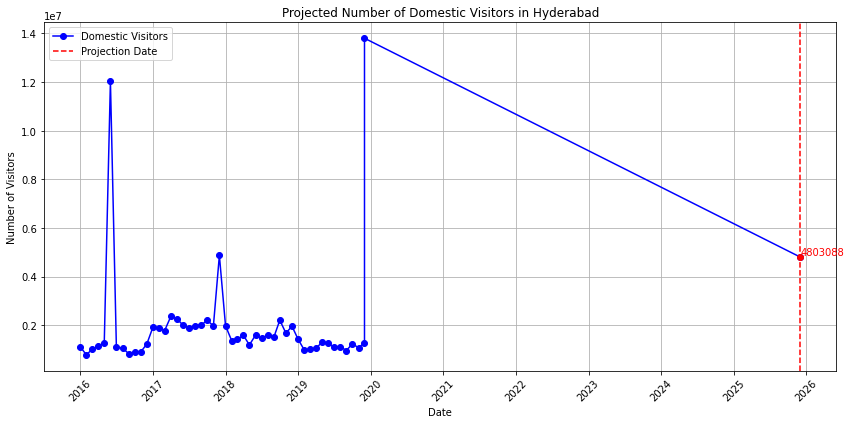

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(combined_data['date'], combined_data['visitors'], marker='o', linestyle='-', color='b', label='Domestic Visitors')
plt.axvline(x=projected_date, color='r', linestyle='--', label='Projection Date')
plt.scatter(projected_date, projected_visitors, color='r', zorder=5)
plt.text(projected_date, projected_visitors, f'{projected_visitors:.0f}', color='r', ha='left', va='bottom')

plt.title('Projected Number of Domestic Visitors in Hyderabad')
plt.xlabel('Date')
plt.ylabel('Number of Visitors')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()
plt.show()

In [34]:
projected_visitors

4803087.792142787

In [35]:
newdata = pd.merge(dom_vis2, for_vis, on = 'district', suffixes= ('_domestic', '_foreign'))

In [36]:
newdata

,district,date_domestic,month_domestic,year_domestic,visitors_domestic,date_foreign,month_foreign,year_foreign,visitors_foreign
0,Adilabad,2016-01-01,January,2016,792136.0,2016-01-01,January,2016,2
1,Adilabad,2016-01-01,January,2016,792136.0,2016-02-01,February,2016,0
2,Adilabad,2016-01-01,January,2016,792136.0,2016-03-01,March,2016,2
3,Adilabad,2016-01-01,January,2016,792136.0,2016-04-01,April,2016,0
4,Adilabad,2016-01-01,January,2016,792136.0,2016-05-01,May,2016,0
...,...,...,...,...,...,...,...,...,...
71563,Yadadri Bhongir,2019-12-01,December,2019,477635.0,2019-08-01,August,2019,0
71564,Yadadri Bhongir,2019-12-01,December,2019,477635.0,2019-09-01,September,2019,0
71565,Yadadri Bhongir,2019-12-01,December,2019,477635.0,2019-10-01,October,2019,0
71566,Yadadri Bhongir,2019-12-01,December,2019,477635.0,2019-11-01,November,2019,0


In [37]:
# Creating a report
import sweetviz as sv
report = sv.analyze(dom_vis2)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [38]:
dom_vis3 = dom_vis2.copy()

In [39]:
pivot_dom_vis2 = dom_vis3.pivot_table(index = 'date', columns = 'district', values = 'visitors', aggfunc = 'sum')
pivot_dom_vis2.fillna(0,inplace = True)
pivot_dom_vis2

district,Adilabad,Bhadradri Kothagudem,Hyderabad,Jagtial,Jangaon,Jayashankar Bhoopalpally,Jogulamba Gadwal,Kamareddy,Karimnagar,Khammam,...,Rajanna Sircilla,Ranga Reddy,Sangareddy,Siddipet,Suryapet,Vikarabad,Wanaparthy,Warangal (Rural),Warangal (Urban),Yadadri Bhongir
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,792136.0,0.0,1122510.0,0.0,0.0,0.0,0.0,0.0,1984442.0,651827.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985815.0,0.0
2016-02-01,937820.0,0.0,778748.0,0.0,0.0,0.0,0.0,0.0,779960.0,407533.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20703778.0,0.0
2016-03-01,582946.0,0.0,1017794.0,0.0,0.0,0.0,0.0,0.0,1018399.0,458527.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,568397.0,0.0
2016-04-01,341948.0,0.0,1127738.0,0.0,0.0,0.0,0.0,0.0,956959.0,971622.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317643.0,0.0
2016-05-01,252887.0,0.0,1287181.0,0.0,0.0,0.0,0.0,0.0,1095642.0,433994.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,373788.0,0.0
2016-06-01,368237.0,0.0,12032661.0,0.0,0.0,0.0,0.0,0.0,914746.0,445862.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,365332.0,0.0
2016-07-01,447562.0,0.0,1096754.0,0.0,0.0,0.0,0.0,0.0,401047.0,414963.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340320.0,0.0
2016-08-01,614285.0,0.0,1061137.0,0.0,0.0,0.0,0.0,0.0,1018399.0,503654.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,368755.0,0.0
2016-09-01,491279.0,0.0,832987.0,0.0,0.0,0.0,0.0,0.0,956959.0,368437.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,379210.0,0.0


In [40]:
corr_matrix = pivot_dom_vis2.corr()
corr_matrix

district,Adilabad,Bhadradri Kothagudem,Hyderabad,Jagtial,Jangaon,Jayashankar Bhoopalpally,Jogulamba Gadwal,Kamareddy,Karimnagar,Khammam,...,Rajanna Sircilla,Ranga Reddy,Sangareddy,Siddipet,Suryapet,Vikarabad,Wanaparthy,Warangal (Rural),Warangal (Urban),Yadadri Bhongir
district,,,,,,,,,,,,,,,,,,,,,
Adilabad,1.000000,-0.169620,0.007030,-0.596784,-0.679567,-0.022785,-0.409582,-0.800831,0.817704,0.713466,...,-0.370609,NaN,-0.541680,-0.318385,NaN,NaN,-0.671735,-0.615911,0.576033,-0.362601
Bhadradri Kothagudem,-0.169620,1.000000,-0.048186,0.072517,0.181847,-0.021742,0.064389,0.115322,-0.146754,-0.133416,...,0.083473,NaN,0.156710,0.912016,NaN,NaN,0.085391,0.184070,-0.056128,0.002982
Hyderabad,0.007030,-0.048186,1.000000,-0.054994,-0.193199,0.000656,-0.089042,-0.140793,0.110742,0.094031,...,-0.042877,NaN,-0.148856,-0.120179,NaN,NaN,-0.151931,-0.178684,-0.086571,-0.063505
Jagtial,-0.596784,0.072517,-0.054994,1.000000,0.457115,0.318992,0.377637,0.653244,-0.645742,-0.615388,...,0.421655,NaN,0.349238,0.274779,NaN,NaN,0.436057,0.484313,-0.251568,0.539992
Jangaon,-0.679567,0.181847,-0.193199,0.457115,1.000000,0.039449,0.444539,0.763800,-0.728537,-0.714121,...,0.417257,NaN,0.559798,0.409006,NaN,NaN,0.797717,0.944693,-0.280016,0.238274
Jayashankar Bhoopalpally,-0.022785,-0.021742,0.000656,0.318992,0.039449,1.000000,0.393152,0.107544,-0.117773,-0.131428,...,0.174568,NaN,0.253377,0.019723,NaN,NaN,0.147207,0.180682,-0.045926,0.722884
Jogulamba Gadwal,-0.409582,0.064389,-0.089042,0.377637,0.444539,0.393152,1.000000,0.600810,-0.580282,-0.579223,...,0.304262,NaN,0.410925,0.192283,NaN,NaN,0.471431,0.411180,-0.225634,0.462097
Kamareddy,-0.800831,0.115322,-0.140793,0.653244,0.763800,0.107544,0.600810,1.000000,-0.879242,-0.855811,...,0.381815,NaN,0.567523,0.321919,NaN,NaN,0.789055,0.689780,-0.341853,0.417930
Karimnagar,0.817704,-0.146754,0.110742,-0.645742,-0.728537,-0.117773,-0.580282,-0.879242,1.000000,0.874400,...,-0.414570,NaN,-0.567755,-0.354470,NaN,NaN,-0.761285,-0.662041,0.274598,-0.410571


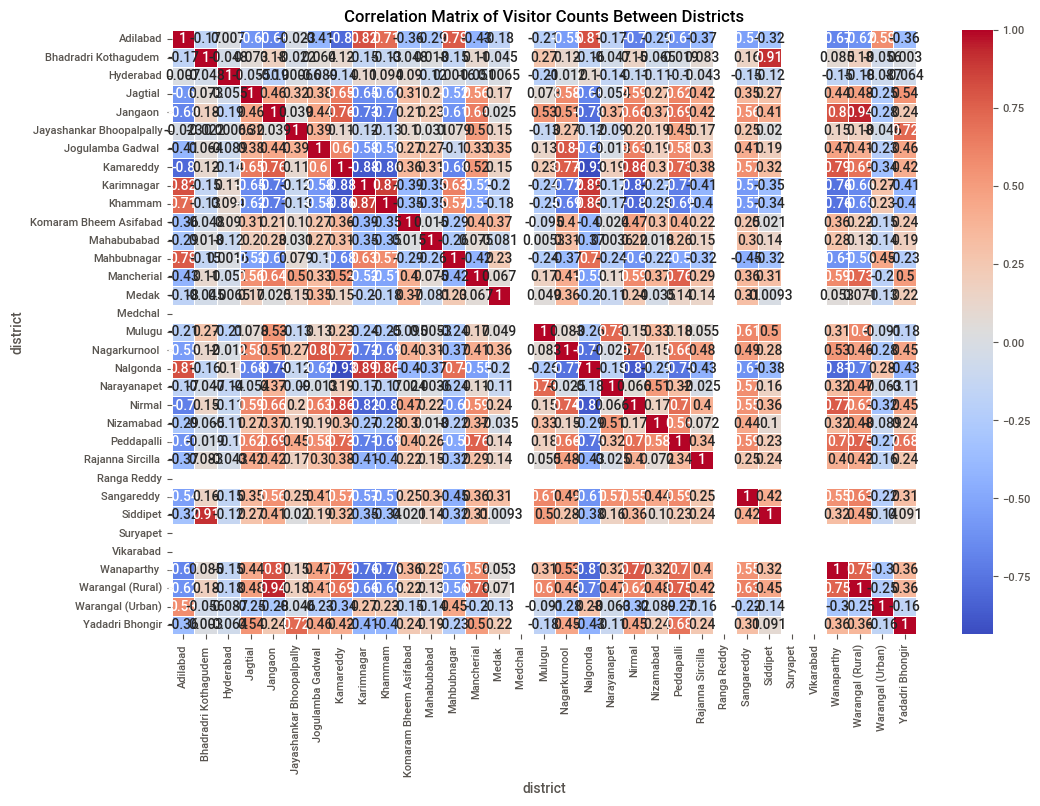

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Visitor Counts Between Districts')
plt.show()

In [43]:
report = sv.analyze(pivot_dom_vis2)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
